### Import

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Exploring Data

Data of this project include:  
- Unicorn company around the world as of August, 2020 (*__CB-Insights_Global-Unicorns_2020.csv__*).  
- Indian Startups and Investors (*__starup_funding.csv__*)
- Startup fundraising dataset (*__funds.csv__*)



We will analize distribution of unicorns,the top investors in each fields and the most popular investment trends.  
Analyze Indian startups and draw conclusions.

## Read csv file

In [2]:
unicorn_df = pd.read_csv("CB-Insights_Global-Unicorns_2020.csv")
startup_df = pd.read_csv("startup_funding.csv")

## Data overview

### Unicorns data

In [3]:
unicorn_df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors
0,0,Toutiao (Bytedance),$140,4/7/2017,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,Didi Chuxing,$56,12/31/2014,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Sof..."
2,2,SpaceX,$46,12/1/2012,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothe..."
3,3,Stripe,$36,1/23/2014,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Palantir Technologies,$20,5/5/2011,United States,Data management & analytics,"RRE Ventures, Founders Fund, In-Q-Tel"


In [4]:
unicorn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        472 non-null    int64 
 1   Company           472 non-null    object
 2   Valuation ($B)    472 non-null    object
 3   Date Joined       472 non-null    object
 4   Country           472 non-null    object
 5   Industry          472 non-null    object
 6   Select Investors  471 non-null    object
dtypes: int64(1), object(6)
memory usage: 25.9+ KB


In [5]:
unicorn_df.nunique()

Unnamed: 0          472
Company             472
Valuation ($B)      117
Date Joined         401
Country              30
Industry             16
Select Investors    469
dtype: int64

In [6]:
unicorn_df.shape

(472, 7)

In [8]:
print("NaN")
print(unicorn_df.isnull().sum())

NaN
Unnamed: 0          0
Company             0
Valuation ($B)      0
Date Joined         0
Country             0
Industry            0
Select Investors    1
dtype: int64


### Getting to know the variables:  
- __Company__: Company's name
- __Valuation__: The value of a startup company (billion)  
- __Date joined__: Unicorn date  
- __Country__: The country where the unicorn is based
- __Category__: Company field
- __Select__ Investors: Investors for unicorns.


- Data has 449 rows and 6 columns:  
- Only 1 rows contains NaN value in "Select Investors" columns.
- 449 unicorns is recorgnized as of 1/29/2020.  
- 27 countries has unicorns.  
- 16 fields is selected and became unicorns.  
- The data type of 6 columns is object. But the data type of "valuation" columns should be Numerical, "Date joined" column should be datetime.

### Data Preprocessing

In [11]:
unicorn_df= unicorn_df.rename(columns = {'Unnamed': 'Rank'})
unicorn_df.head()

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors
0,0,Toutiao (Bytedance),$140,4/7/2017,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,Didi Chuxing,$56,12/31/2014,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Sof..."
2,2,SpaceX,$46,12/1/2012,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothe..."
3,3,Stripe,$36,1/23/2014,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Palantir Technologies,$20,5/5/2011,United States,Data management & analytics,"RRE Ventures, Founders Fund, In-Q-Tel"


###  Valuadation columns  
- Deleted '$' and convert to numerical

In [12]:
unicorn_df = unicorn_df.replace('\$', '', regex=True)
unicorn_df["Valuation ($B)"] = unicorn_df["Valuation ($B)"].astype(float)

In [16]:
unicorn_df["Valuation ($B)"].describe()

count    472.000000
mean       3.155805
std        7.800915
min        1.000000
25%        1.000000
50%        1.500000
75%        2.800000
max      140.000000
Name: Valuation ($B), dtype: float64

### Date joined column  
- Converted to datetime

In [37]:
unicorn_df['Date Joined'] = pd.to_datetime(unicorn_df['Date Joined'])
unicorn_df['Date Joined'].describe()

count                     472
unique                    397
top       2018-11-13 00:00:00
freq                        4
first     2010-12-14 00:00:00
last      2020-08-14 00:00:00
Name: Date Joined, dtype: object

### Data after preprocessing

In [38]:
unicorn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Rank              472 non-null    int64         
 1   Company           472 non-null    object        
 2   Valuation ($B)    472 non-null    float64       
 3   Date Joined       472 non-null    datetime64[ns]
 4   Country           472 non-null    object        
 5   Industry          472 non-null    object        
 6   Select Investors  471 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 25.9+ KB


In [19]:
unicorn_df.head()

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors
0,0,Toutiao (Bytedance),140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,Didi Chuxing,56.0,2014-12-31,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Sof..."
2,2,SpaceX,46.0,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothe..."
3,3,Stripe,36.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Palantir Technologies,20.0,2011-05-05,United States,Data management & analytics,"RRE Ventures, Founders Fund, In-Q-Tel"


## Indian Startups Data

### Meaning of data

In [20]:
startup_df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [21]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [22]:
startup_df.nunique()

Sr No                3044
Date dd/mm/yyyy      1035
Startup Name         2459
Industry Vertical     821
SubVertical          1942
City  Location        112
Investors Name       2412
InvestmentnType        55
Amount in USD         471
Remarks                72
dtype: int64

In [23]:
print("NaN")
print(startup_df.isnull().sum())

NaN
Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64


In [24]:
startup_df.shape

(3044, 10)

In [32]:
startup_df = startup_df.drop('Remarks', axis=1)

### Getting to know the variables:  
- __Date__: Date of investment  
- __Startup__ Name: Company name  
- __Industry Vertical__: Main Business field of company  
- __SubVertical__: Sub business field of company  
- __City Location__: The city where the company's headquarters is located  
- __Investors Name__: Investors name  
- __Investors Type__: Type of investment  
- __Amount in USD__: Total amount invested

## Data Preprocessing

__Date column__  
- Covert to datetime  
Find and replace invalid date in Date columns (dd/mm/yyyy) to valid date.

In [40]:
data = startup_df['Date dd/mm/yyyy'].values

# Create dataframe
df = pd.DataFrame({'Date': data})

# Add 'corect' column to evalue 'Date' column corect or not
df['correct'] = pd.to_datetime(df['Date'],errors='coerce') #If 'coerce', then invalid parsing will be set as NaT.
df

,Date,correct
0,09/01/2020,2020-09-01
1,13/01/2020,2020-01-13
2,09/01/2020,2020-09-01
3,02/01/2020,2020-02-01
4,02/01/2020,2020-02-01
...,...,...
3039,29/01/2015,2015-01-29
3040,29/01/2015,2015-01-29
3041,30/01/2015,2015-01-30
3042,30/01/2015,2015-01-30


In [42]:
#Invalid value list
errors = df.loc[df['correct'].isnull()]['Date'].tolist()
errors

['05/072018', '01/07/015', '\\\\xc2\\\\xa010/7/2015', '22/01//2015']

In [43]:
startup_df['Date dd/mm/yyyy'].replace((['05/072018', '01/07/015', '\\\\xc2\\\\xa010/7/2015', '22/01//2015']),
                                        ('05/07/2018', '01/07/2015', '22/01/2015', '10/07/2015'), inplace=True)

In [45]:
startup_df['Date dd/mm/yyyy'] = pd.to_datetime(startup_df['Date dd/mm/yyyy'])

In [46]:
startup_df['Date dd/mm/yyyy'].describe()

count                    3044
unique                   1030
top       2015-08-07 00:00:00
freq                       11
first     2015-01-05 00:00:00
last      2020-10-01 00:00:00
Name: Date dd/mm/yyyy, dtype: object

As we can see:  
- We have 3044 rows, only 1030 unique values.  
- Successful fundraising rounds from 01/05/2015 to 10/01/2020

__Amount in USD column__

- Convert to float, handle invalid data   

In [48]:
startup_df['Amount in USD'] = startup_df["Amount in USD"].replace(",", "")
startup_df['Amount in USD'] = startup_df["Amount in USD"].replace("+", "")

In [51]:
startup_df['Amount in USD'] = startup_df['Amount in USD'].apply(lambda x: str(str(x).replace(",", "").replace("+", "")))

In [52]:
startup_df = startup_df.replace('\\\\\\\\xc2\\\\\\\\xa0','', regex=True)

In [53]:
startup_df['Amount in USD'].replace((['undisclosed', 'unknown','Undisclosed', 'N/A']),
                         ('NaN','NaN','NaN','NaN'), inplace=True)

In [54]:
startup_df['Amount in USD'] = startup_df['Amount in USD'].apply(lambda x: float(x))

In [55]:
startup_df['Amount in USD'].describe()

count    2.073000e+03
mean     1.840034e+07
std      1.211407e+08
min      1.600000e+04
25%      4.860000e+05
50%      1.750000e+06
75%      8.000000e+06
max      3.900000e+09
Name: Amount in USD, dtype: float64

### Data after preprocessing

In [56]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              3044 non-null   int64         
 1   Date dd/mm/yyyy    3044 non-null   datetime64[ns]
 2   Startup Name       3044 non-null   object        
 3   Industry Vertical  2873 non-null   object        
 4   SubVertical        2108 non-null   object        
 5   City  Location     2864 non-null   object        
 6   Investors Name     3020 non-null   object        
 7   InvestmentnType    3040 non-null   object        
 8   Amount in USD      2073 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 214.2+ KB


In [57]:
startup_df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


## Exploring Data

### Review Data

In [58]:
unicorn_df.head()

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors
0,0,Toutiao (Bytedance),140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,Didi Chuxing,56.0,2014-12-31,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Sof..."
2,2,SpaceX,46.0,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothe..."
3,3,Stripe,36.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Palantir Technologies,20.0,2011-05-05,United States,Data management & analytics,"RRE Ventures, Founders Fund, In-Q-Tel"


In [59]:
startup_df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


## Answer the questions
__Unicorns data__
- Number of unicorns by country, which country has the most unicorns.  
- Which field has the most unicorns. Sort by company's value. Top 5 fields with the highest value.  
- Which investors have ownership the most unicorns.  
- The numbers of unicorns by years. Which years has the most unicorns.  
- Statistics in Southeast Asia. 

__Startup data in India__  
- Which field has the most unicorns in India. Is it similar to the trend of the world?  
- The distribution of SubVertical.  
- Subvertical distribution of top 3 Industry Vertical.  
- Distribution of funding in India. 
- Startups, fields with potential for investment. 
- Amount invested over time.
- Which startups have the most investment rounds in India.

## Data Processing

__Unicorns data__

Add new clolumns such as Investor_1, Investor_2,.. from Investor columns.  
Handling data inconsistency such as ('.', ','), ('and', ','), Upper all of company name,..

In [60]:
unicorn_df.iloc[406]

Rank                                                          406
Company                                                     Loggi
Valuation ($B)                                                1.0
Date Joined                                   2019-06-05 00:00:00
Country                                                    Brazil
Industry                      Supply chain, logistics, & delivery
Select Investors    Qualcomm Ventures, SoftBank Group. Monashees+
Name: 406, dtype: object

In [61]:
unicorn_df.loc[unicorn_df['Rank'] == 406, 'Select Investors'] = 'Qualcomm Ventures, SoftBank Group, Monashees+'

In [62]:
unicorn_df.iloc[1]

Rank                                                                1
Company                                                Didi Chuxing  
Valuation ($B)                                                   56.0
Date Joined                                       2014-12-31 00:00:00
Country                                                         China
Industry                                        Auto & transportation
Select Investors    Matrix Partners, Tiger  Global Management, Sof...
Name: 1, dtype: object

In [63]:
unicorn_df.loc[unicorn_df['Rank'] == 1, 'Select Investors'] = 'Matrix Partners, Tiger  Global Management, Sofbank Corp.'

In [64]:
unicorn_df = unicorn_df.replace('and','', regex=True)

In [66]:
unicorn_df[unicorn_df['Select Investors'].str.contains("SoftBankGroup", na=False)]

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors
27,27,Roivant Sciences,9.09,2018-11-13,United States,Health,"SoftBankGroup, Founders Fund"
34,34,Snapdeal,7.00,2014-05-21,India,E-commerce & direct-to-consumer,"SoftBankGroup, Blackrock, Alibaba Group"
35,35,Tokopedia,7.00,2018-12-12,Indonesia,E-commerce & direct-to-consumer,"SoftBankGroup, Alibaba Group, Sequoia Capital ..."


In [69]:
unicorn_df = unicorn_df.replace('SoftBankGroup', 'Sortbank Group', regex=True)

In [72]:
df = pd.concat([unicorn_df['Select Investors'].str.split(',', expand=True)], axis=1)
df

,0,1,2,3
0,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,Matrix Partners,Tiger Global Management,Sofbank Corp.,None
2,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
3,Khosla Ventures,LowercaseCapital,capitalG,None
4,RRE Ventures,Founders Fund,In-Q-Tel,None
...,...,...,...,...
467,Coty,None,None,None
468,Upper90,RiverPark Ventures,Advent International,None
469,WRVI Capital,Qualcomm Ventures,S-Cubed Capital,None
470,One Equity Partners,None,None,None


In [78]:
df = pd.concat([unicorn_df['Select Investors'].str.split(',', expand=True)], axis=1)
unicorn_df = unicorn_df.merge(df)
unicorn_df = unicorn_df.rename(columns = {0:'Investor_1', 1: 'Investor_2', 2: 'Investor_3', 3: 'Investor_4'})
unicorn_df['Investor_1'] = unicorn_df['Investor_1'].str.strip()
unicorn_df['Investor_2'] = unicorn_df['Investor_2'].str.strip()
unicorn_df['Investor_3'] = unicorn_df['Investor_3'].str.strip()
unicorn_df['Investor_4'] = unicorn_df['Investor_4'].str.strip()

unicorn_df['Investor_1'] = unicorn_df['Investor_1'].str.upper()
unicorn_df['Investor_2'] = unicorn_df['Investor_2'].str.upper()
unicorn_df['Investor_3'] = unicorn_df['Investor_3'].str.upper()
unicorn_df['Investor_4'] = unicorn_df['Investor_4'].str.upper()
unicorn_df.head()

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
0,0,Toutiao (Bytedance),140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",SEQUOIA CAPITAL CHINA,SIG ASIA INVESTMENTS,SINA WEIBO,SOFTBANK GROUP
1,1,Didi Chuxing,56.0,2014-12-31,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Sofb...",MATRIX PARTNERS,TIGER GLOBAL MANAGEMENT,SOFBANK CORP.,None
2,2,SpaceX,46.0,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothe...",FOUNDERS FUND,DRAPER FISHER JURVETSON,ROTHENBERG VENTURES,None
3,3,Stripe,36.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",KHOSLA VENTURES,LOWERCASECAPITAL,CAPITALG,None
4,4,Palantir Technologies,20.0,2011-05-05,United States,Data management & analytics,"RRE Ventures, Founders Fund, In-Q-Tel",RRE VENTURES,FOUNDERS FUND,IN-Q-TEL,None


## Answer the questions
__Unicorns data__
- Number of unicorns by country, which country has the most unicorns.  
- Which field has the most unicorns. Sort by company's value. Top 5 fields with the highest value.  
- Which investors have ownership the most unicorns.  
- The numbers of unicorns by years. Which years has the most unicorns.  
- Statistics in Southeast Asia. 

__Number of unicorns by country, which country has the most unicorns?__

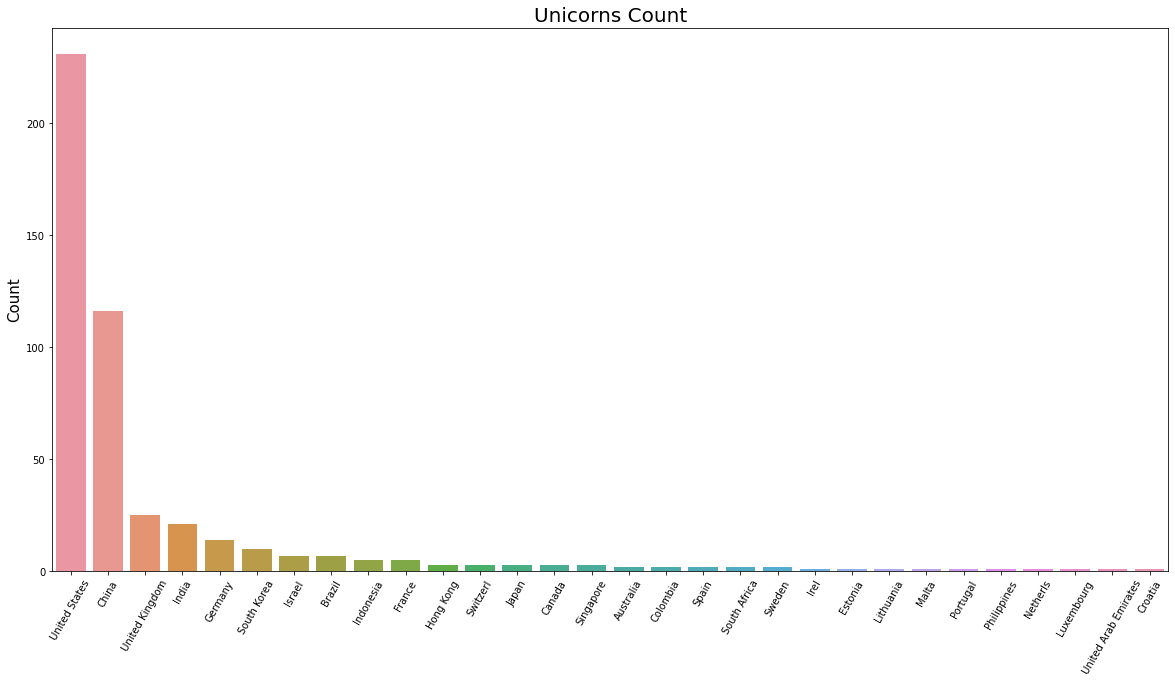

In [81]:
country_unicorns = unicorn_df['Country'].value_counts()
plt.figure(figsize= (20,10))
g = sns.barplot(x=country_unicorns.index, y=country_unicorns.values)
g.set_xticklabels(g.get_xticklabels(), rotation=60)
g.set_title("Unicorns Count", fontsize=20)
g.set_ylabel("Count", fontsize=15)
plt.show()

As we can see:  
- US is country with the most unicorns, Double the amount of China (2nd).  
- UK ranked 3rd, Indian ranked 4th (much less than the number of unicorns in the US and China).  
- 3 countries in Southeast Asia:  Indonesia, Singapore, Philippines.

__Which field has the most unicorns. Sort by company's value. Top 5 fields with the highest value.__  

In [84]:
category_unicorns = unicorn_df['Industry'].value_counts()
category_unicorns[:5]

Fintech                            62
Internet software & services       58
E-commerce & direct-to-consumer    57
Artificial intelligence            46
Health                             35
Name: Industry, dtype: int64

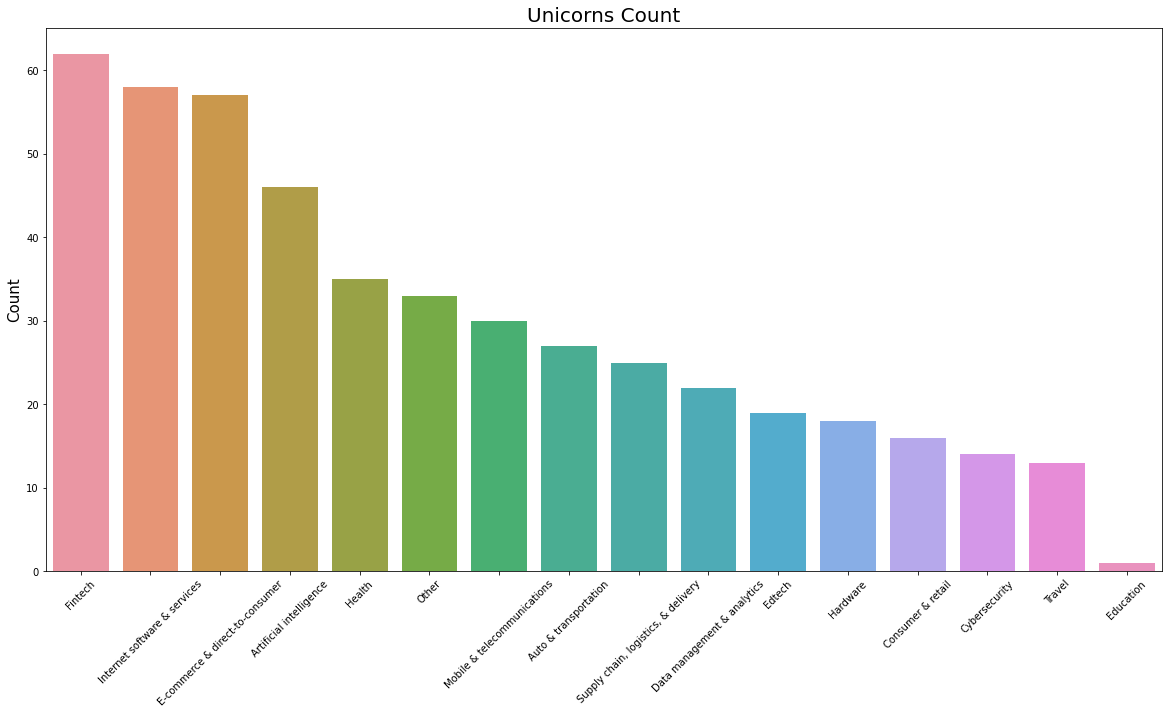

In [86]:
plt.figure(figsize = (20,10))

g = sns.barplot(x=category_unicorns.index ,y=category_unicorns.values)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Unicorns Count", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.show()

__Top 5 fields with the highest value is:__  
- Fintech  
- Internet software and services  
- E-commerce & direct-to-consumer  
- Artificial intelligence  
- Health

This is startup trends of the world: Fintech. 

In [87]:
unicorn_df[unicorn_df['Industry'] == 'Fintech'].sort_values(by='Valuation ($B)', ascending=False).head(5)

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
3,3,Stripe,36.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",KHOSLA VENTURES,LOWERCASECAPITAL,CAPITALG,None
8,8,One97 Communications,16.0,2015-05-12,India,Fintech,"Intel Capital, Sapphire Ventures, Alibaba Group",INTEL CAPITAL,SAPPHIRE VENTURES,ALIBABA GROUP,None
19,19,Robinhood,11.2,2017-04-26,United States,Fintech,"Google Ventures, Andreessen Horowitz, DST Global",GOOGLE VENTURES,ANDREESSEN HOROWITZ,DST GLOBAL,None
24,24,Nubank,10.0,2018-03-01,Brazil,Fintech,"Sequoia Capital, Redpoint e.ventures, Kaszek V...",SEQUOIA CAPITAL,REDPOINT E.VENTURES,KASZEK VENTURES,None
26,26,Ripple,10.0,2019-12-20,United States,Fintech,"IDG Capital, Venture51, Lightspeed Venture Par...",IDG CAPITAL,VENTURE51,LIGHTSPEED VENTURE PARTNERS,None


- There are 3 out of 5 unicorns of US.  
- Top 2 is a unicorns in India.

In [88]:
unicorn_df[unicorn_df['Industry'] == 'Internet software & services'].sort_values(by='Valuation ($B)', ascending=False).head(5)

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
46,46,Canva,6.0,2018-01-08,Australia,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",SEQUOIA CAPITAL CHINA,BLACKBIRD VENTURES,MATRIX PARTNERS,None
51,51,Vice Media,5.7,2013-08-17,United States,Internet software & services,"Technology Crossover Ventures, A&E Television ...",TECHNOLOGY CROSSOVER VENTURES,A&E TELEVISION NETWORKS,None,None
56,56,HashiCorp,5.1,2018-11-01,United States,Internet software & services,"Redpoint Ventures, True Ventures, Mayfield Fund",REDPOINT VENTURES,TRUE VENTURES,MAYFIELD FUND,None
72,72,Roblox,4.0,2018-09-04,United States,Internet software & services,"Atlos Ventures, Index Ventures, First Round Ca...",ATLOS VENTURES,INDEX VENTURES,FIRST ROUND CAPITAL,None
86,86,Freshworks,3.5,2018-07-31,United States,Internet software & services,"Accel, Tiger Global Management, capitalG",ACCEL,TIGER GLOBAL MANAGEMENT,CAPITALG,None


In [89]:
unicorn_df[unicorn_df['Industry'] == 'E-commerce & direct-to-consumer'].sort_values(by='Valuation ($B)', ascending=False).head(5)

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
11,11,SHEIN,15.0,2018-07-03,China,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",TIGER GLOBAL MANAGEMENT,SEQUOIA CAPITAL CHINA,SHUNWEI CAPITAL PARTNERS,None
18,18,Wish,11.2,2015-05-18,United States,E-commerce & direct-to-consumer,"Founders Fund, GGV Capital, Digital Sky Techno...",FOUNDERS FUND,GGV CAPITAL,DIGITAL SKY TECHNOLOGIES,None
29,29,Coupang,9.0,2014-05-28,South Korea,E-commerce & direct-to-consumer,"Sequoia Capital, Founder Collective, Wellingt...",SEQUOIA CAPITAL,FOUNDER COLLECTIVE,WELLINGTON MANAGEMENT,None
30,30,Guazi (Chehaoduo),9.0,2016-03-12,China,E-commerce & direct-to-consumer,"Sequoia Capital China, GX Capital",SEQUOIA CAPITAL CHINA,GX CAPITAL,None,None
34,34,Snapdeal,7.0,2014-05-21,India,E-commerce & direct-to-consumer,"Sortbank Group, Blackrock, Alibaba Group",SORTBANK GROUP,BLACKROCK,ALIBABA GROUP,None


There are 2 unicorns in this industry of China.  
Shopee, Lazada are technology company in e_commerce in Southeast Asia.

In [91]:
unicorn_df[unicorn_df['Industry'] == 'Artificial intelligence'].sort_values(by='Valuation ($B)', ascending=False).head(5)

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
0,0,Toutiao (Bytedance),140.00,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",SEQUOIA CAPITAL CHINA,SIG ASIA INVESTMENTS,SINA WEIBO,SOFTBANK GROUP
22,22,UiPath,10.20,2018-03-02,United States,Artificial intelligence,"Accel, capitalG, Earlybrid Venture Capital, Se...",ACCEL,CAPITALG,EARLYBRID VENTURE CAPITAL,SEEDCAMP
33,33,SenseTime,7.50,2017-07-11,China,Artificial intelligence,"Star VC, IDG Capital, Infore Capital, Alibaba ...",STAR VC,IDG CAPITAL,INFORE CAPITAL,ALIBABA GROUP
36,36,Argo AI,7.25,2019-07-12,United States,Artificial intelligence,"Volkswagen Group, Ford Autonomous Vehicles",VOLKSWAGEN GROUP,FORD AUTONOMOUS VEHICLES,None,None
37,37,Automation Anywhere,6.80,2018-07-02,United States,Artificial intelligence,"General Atlantic, Goldman Sachs, New Enterpris...",GENERAL ATLANTIC,GOLDMAN SACHS,NEW ENTERPRISE ASSOCIATES,None


- Top 1 is Bytedance in China. Tiktok is one of product of Bytedance.  
- Argo AI is an autonomous driving technology company.  
- UIPath, Automation Anywhere are software company that makes robotic process automation software.  
- SenseTime develops technologies including facial recognition, image recognition, object detection, optical character recognition, medical image analysis, video analysis, autonomous driving, and remote sensing.

In [92]:
unicorn_df[unicorn_df['Industry'] == 'Health'].sort_values(by= 'Valuation ($B)', ascending=False).head(5)

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
17,17,Samumed,12.00,2018-08-06,United States,Health,"Vickers Venture Partners, IKEA GreenTech",VICKERS VENTURE PARTNERS,IKEA GREENTECH,None,None
27,27,Roivant Sciences,9.09,2018-11-13,United States,Health,"Sortbank Group, Founders Fund",SORTBANK GROUP,FOUNDERS FUND,None,None
53,53,GuaHao (We Doctor),5.50,2015-09-22,China,Health,"Tencent, Morningside Group",TENCENT,MORNINGSIDE GROUP,None,None
57,57,United Imaging Healthcare,5.00,2017-09-14,China,Health,"China Life Insurance, China Development Bank C...",CHINA LIFE INSURANCE,CHINA DEVELOPMENT BANK CAPITAL,CITIC SECURITIES INTERNATIONAL,None
61,61,Tempus,5.00,2018-03-21,United States,Health,"New Enterprise Associates, T. Rowe Associates,...",NEW ENTERPRISE ASSOCIATES,T. ROWE ASSOCIATES,LIGHTBANK,None


__Top 10 highest valued startups__

In [93]:
unicorn_df.sort_values(by='Valuation ($B)', ascending=False).head(10)

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4
0,0,Toutiao (Bytedance),140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",SEQUOIA CAPITAL CHINA,SIG ASIA INVESTMENTS,SINA WEIBO,SOFTBANK GROUP
1,1,Didi Chuxing,56.0,2014-12-31,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Sofb...",MATRIX PARTNERS,TIGER GLOBAL MANAGEMENT,SOFBANK CORP.,None
2,2,SpaceX,46.0,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothe...",FOUNDERS FUND,DRAPER FISHER JURVETSON,ROTHENBERG VENTURES,None
3,3,Stripe,36.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",KHOSLA VENTURES,LOWERCASECAPITAL,CAPITALG,None
4,4,Palantir Technologies,20.0,2011-05-05,United States,Data management & analytics,"RRE Ventures, Founders Fund, In-Q-Tel",RRE VENTURES,FOUNDERS FUND,IN-Q-TEL,None
5,5,Airbnb,18.0,2011-07-26,United States,Travel,"General Catalyst Partners, Andreessen Horowit...",GENERAL CATALYST PARTNERS,ANDREESSEN HOROWITZ,ENIAC VENTURES,None
6,6,Kuaishou,18.0,2015-01-01,China,Mobile & telecommunications,"Morningside Venture Capital, Sequoia Capital, ...",MORNINGSIDE VENTURE CAPITAL,SEQUOIA CAPITAL,BAIDU,None
7,7,Epic Games,17.3,2018-10-26,United States,Other,"Tencent Holdings, KKR, Smash Ventures",TENCENT HOLDINGS,KKR,SMASH VENTURES,None
8,8,One97 Communications,16.0,2015-05-12,India,Fintech,"Intel Capital, Sapphire Ventures, Alibaba Group",INTEL CAPITAL,SAPPHIRE VENTURES,ALIBABA GROUP,None
9,9,DoorDash,16.0,2018-03-01,United States,"Supply chain, logistics, & delivery","Softbank Group, Sequoia Capital, Khosla Ventures",SOFTBANK GROUP,SEQUOIA CAPITAL,KHOSLA VENTURES,None


Create Log Normal Distribution

In [97]:
unicorn_df['Valuation ($B) log'] = np.log(unicorn_df['Valuation ($B)']+1)
unicorn_df[['Valuation ($B)', 'Valuation ($B) log']].head()

,Valuation ($B),Valuation ($B) log
0,140.0,4.948760
1,56.0,4.043051
2,46.0,3.850148
3,36.0,3.610918
4,20.0,3.044522


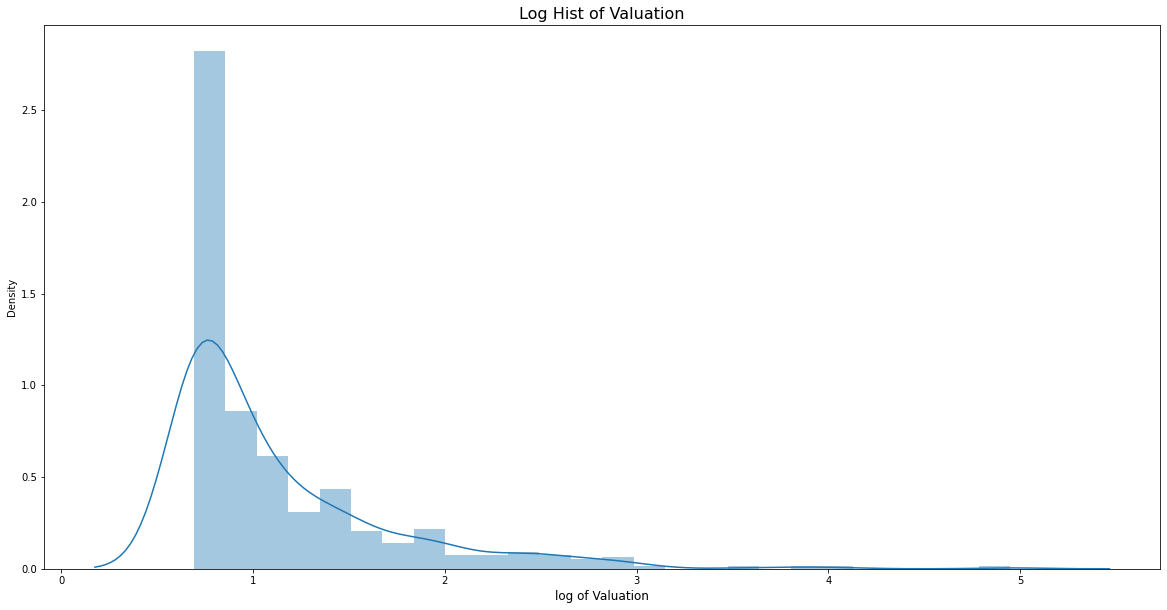

In [101]:
plt.figure(figsize=(20,10))
sns.distplot(unicorn_df['Valuation ($B) log'])
plt.xlabel('log of Valuation', fontsize=12)
plt.title("Log Hist of Valuation", fontsize=16)
plt.show()

Some unicorns are much more valuable than others

__Which investors have ownership the most unicorns?__

Count the numbers of investors in 4 columns.

In [103]:
investor_unicorns = unicorn_df[['Investor_1', 'Investor_2', 'Investor_3', 'Investor_4']]
count = pd.Series(investor_unicorns.values.ravel()).value_counts() #Series.ravel() function to return the underlying data of the given Series object as an ndarray.
count = count[count.values >= 10]
count

SEQUOIA CAPITAL CHINA               30
SEQUOIA CAPITAL                     25
TENCENT HOLDINGS                    23
SOFTBANK GROUP                      23
ANDREESSEN HOROWITZ                 18
NEW ENTERPRISE ASSOCIATES           18
TIGER GLOBAL MANAGEMENT             17
GENERAL ATLANTIC                    16
GOLDMAN SACHS                       16
IDG CAPITAL                         15
GOOGLE VENTURES                     15
KHOSLA VENTURES                     14
ACCEL                               13
BESSEMER VENTURE PARTNERS           12
GREYLOCK PARTNERS                   12
ALIBABA GROUP                       12
LIGHTSPEED VENTURE PARTNERS         11
QIMING VENTURE PARTNERS             11
GGV CAPITAL                         10
KKR                                 10
DST GLOBAL                          10
KLEINER PERKINS CAUFIELD & BYERS    10
BATTERY VENTURES                    10
INDEX VENTURES                      10
dtype: int64

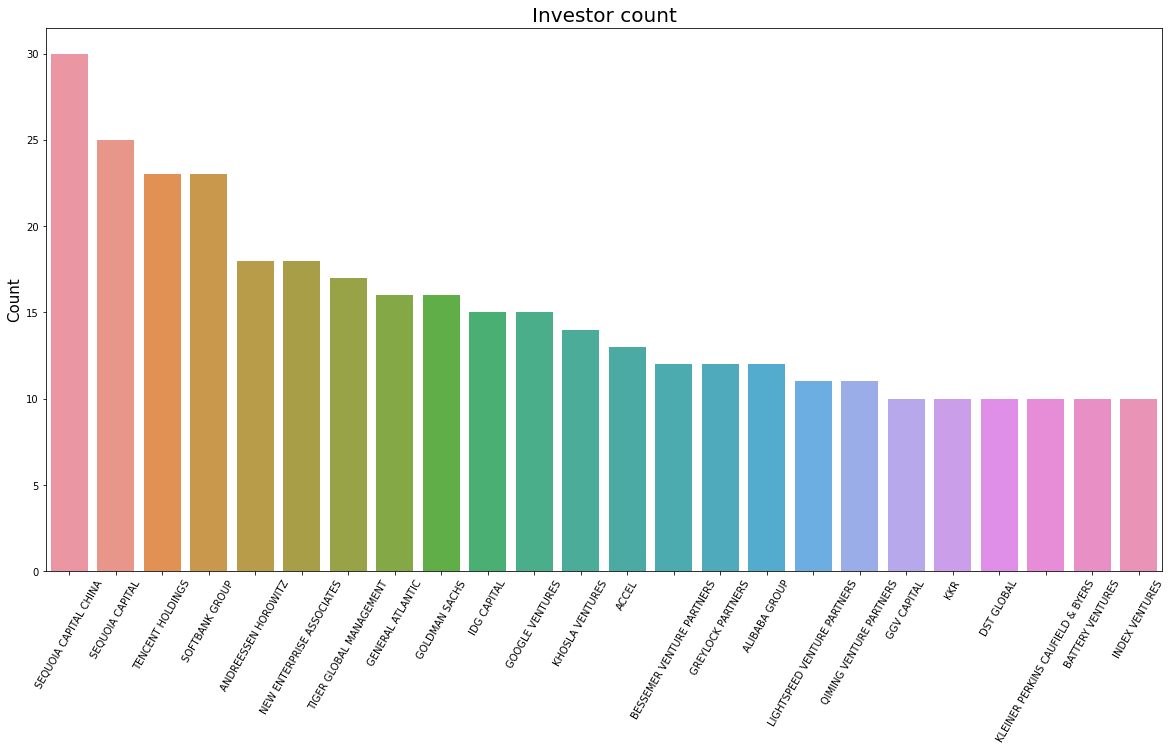

In [105]:
plt.figure(figsize = (20,10))

g = sns.barplot(x=count.index ,y=count.values)
g.set_xticklabels(g.get_xticklabels(),rotation=60)
g.set_title("Investor count", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.show()

This bar chart shows investors with more than 10 unicorns

In [108]:
investor_top10_unicorns = unicorn_df[['Investor_1', 'Investor_2', 'Investor_3', 'Investor_4']].head(10)
count = pd.Series(investor_top10_unicorns.values.ravel()).value_counts()
count

SOFTBANK GROUP                 2
SEQUOIA CAPITAL                2
KHOSLA VENTURES                2
SEQUOIA CAPITAL CHINA          1
IN-Q-TEL                       1
SAPPHIRE  VENTURES             1
INTEL CAPITAL                  1
SMASH VENTURES                 1
KKR                            1
TENCENT HOLDINGS               1
BAIDU                          1
MORNINGSIDE VENTURE CAPITAL    1
ENIAC VENTURES                 1
ANDREESSEN HOROWITZ            1
GENERAL CATALYST PARTNERS      1
FOUNDERS  FUND                 1
SIG ASIA INVESTMENTS           1
RRE VENTURES                   1
CAPITALG                       1
LOWERCASECAPITAL               1
ROTHENBERG VENTURES            1
DRAPER  FISHER JURVETSON       1
FOUNDERS FUND                  1
SOFBANK CORP.                  1
TIGER GLOBAL MANAGEMENT        1
MATRIX PARTNERS                1
SINA WEIBO                     1
ALIBABA GROUP                  1
dtype: int64

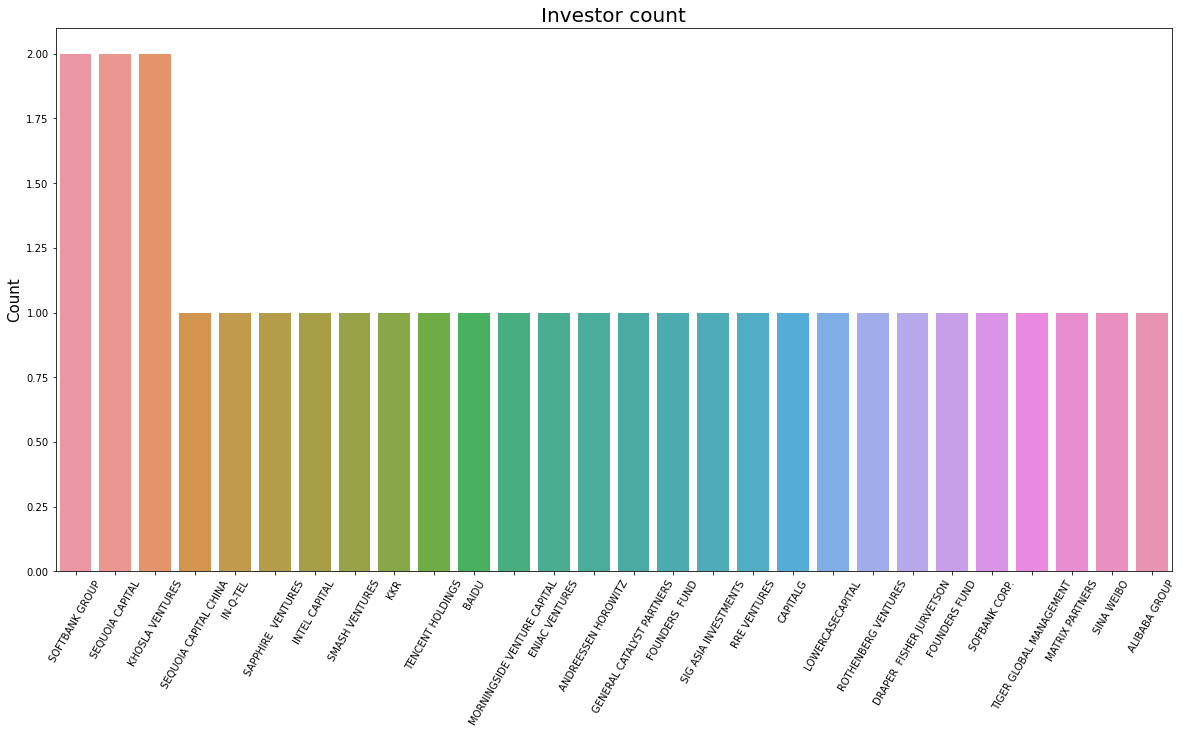

In [109]:
plt.figure(figsize = (20,10))

g = sns.barplot(x=count.index ,y=count.values)
g.set_xticklabels(g.get_xticklabels(),rotation=60)
g.set_title("Investor count", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.show()

This bar chart shows investors of top 10 unicorns.

__The numbers of unicorns by years. Which years has the most unicorns?__

In [112]:
unicorn_df['Year'] = unicorn_df['Date Joined'].dt.year
unicorn_df.head(5)

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4,Valuation ($B) log,Year
0,0,Toutiao (Bytedance),140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",SEQUOIA CAPITAL CHINA,SIG ASIA INVESTMENTS,SINA WEIBO,SOFTBANK GROUP,4.948760,2017
1,1,Didi Chuxing,56.0,2014-12-31,China,Auto & transportation,"Matrix Partners, Tiger Global Management, Sofb...",MATRIX PARTNERS,TIGER GLOBAL MANAGEMENT,SOFBANK CORP.,None,4.043051,2014
2,2,SpaceX,46.0,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothe...",FOUNDERS FUND,DRAPER FISHER JURVETSON,ROTHENBERG VENTURES,None,3.850148,2012
3,3,Stripe,36.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",KHOSLA VENTURES,LOWERCASECAPITAL,CAPITALG,None,3.610918,2014
4,4,Palantir Technologies,20.0,2011-05-05,United States,Data management & analytics,"RRE Ventures, Founders Fund, In-Q-Tel",RRE VENTURES,FOUNDERS FUND,IN-Q-TEL,None,3.044522,2011


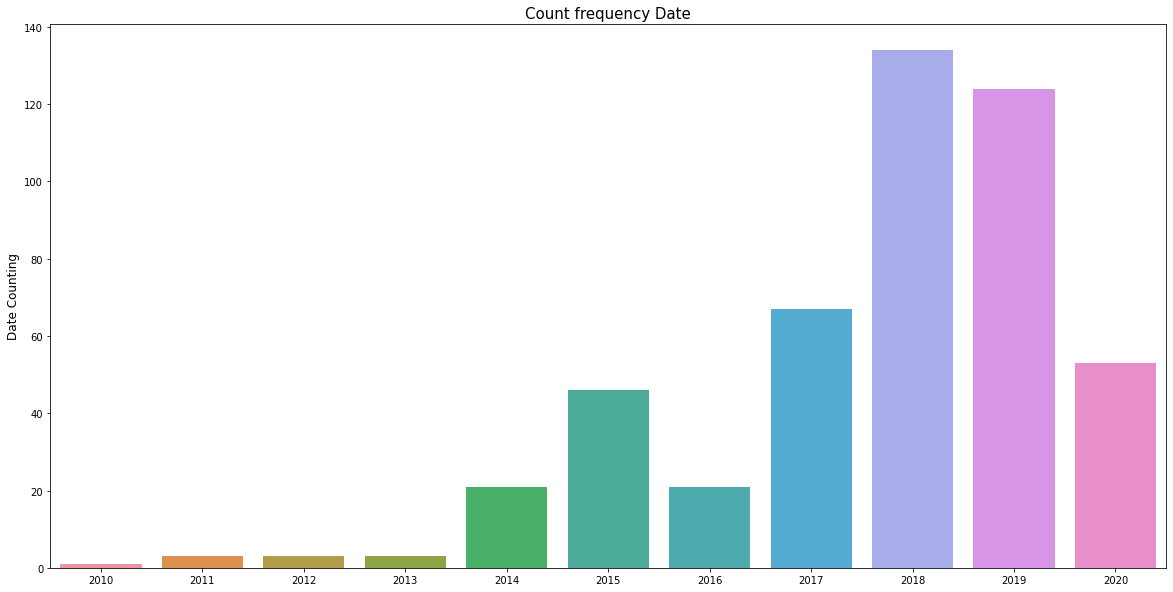

In [113]:
plt.figure(figsize = (20,10))

sns.countplot(x='Year' ,data=unicorn_df)
plt.title("Count frequency Date", fontsize=15)
plt.xlabel("", fontsize=12)
plt.ylabel("Date Counting", fontsize=12)

plt.show()

The year 2018 and 2019 have the most unicorns

__Unicorns in Southeast Asia__

In [120]:
unicorns_sea = unicorn_df[(unicorn_df['Country']=='Singapore') |

                        (unicorn_df['Country']=='Indonesia') |
                        (unicorn_df['Country']=='Philippines')]
unicorns_sea.groupby('Country')['Country'].agg('count')                       

Country
Indonesia      5
Philippines    1
Singapore      3
Name: Country, dtype: int64

In [121]:
unicorns_sea

,Rank,Company,Valuation ($B),Date Joined,Country,Industry,Select Investors,Investor_1,Investor_2,Investor_3,Investor_4,Valuation ($B) log,Year
12,12,Grab,14.3,2014-12-04,Singapore,Auto & transportation,"GGV Capital, Vertex Venture Holdings, Softbank...",GGV CAPITAL,VERTEX VENTURE HOLDINGS,SOFTBANK GROUP,None,2.727853,2014
23,23,Go-Jek,10.0,2016-08-04,Indonesia,"Supply chain, logistics, & delivery","Formation Group, Sequoia Capital India, Warbur...",FORMATION GROUP,SEQUOIA CAPITAL INDIA,WARBURG PINCUS,None,2.397895,2016
35,35,Tokopedia,7.0,2018-12-12,Indonesia,E-commerce & direct-to-consumer,"Sortbank Group, Alibaba Group, Sequoia Capital...",SORTBANK GROUP,ALIBABA GROUP,SEQUOIA CAPITAL INDIA,None,2.079442,2018
87,87,HyalRoute,3.5,2020-05-26,Singapore,Mobile & telecommunications,Kuang-Chi,KUANG-CHI,None,None,None,1.504077,2020
106,106,Traveloka,3.0,2017-07-28,Indonesia,Travel,"Global Founders Capital, East Ventures, Expedi...",GLOBAL FOUNDERS CAPITAL,EAST VENTURES,EXPEDIA INC.,None,1.386294,2017
112,112,OVO,2.9,2019-03-14,Indonesia,Fintech,"Grab, Tokopedia, Tokyo Century Corporation",GRAB,TOKOPEDIA,TOKYO CENTURY CORPORATION,None,1.360977,2019
130,130,Bukalapak,2.5,2017-11-16,Indonesia,E-commerce & direct-to-consumer,"500 Startups, Batavia Incubator, Emtek Group",500 STARTUPS,BATAVIA INCUBATOR,EMTEK GROUP,None,1.252763,2017
258,255,Trax,1.3,2019-07-22,Singapore,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T...",HOPU INVESTMENT MANAGEMENT,BOYU CAPITAL,DC THOMSON VENTURES,None,0.832909,2019
366,362,Revolution Precrafted,1.0,2017-10-23,Philippines,Other,"K2 Global, 500 Startups",K2 GLOBAL,500 STARTUPS,None,None,0.693147,2017


- Indonesia is a country with the most unicorns in Southeast Asia.  
- Grab and Go-Jek is the highest valued unicorns in Southeast Asia.


__Startups in India__  
- Which field has the most unicorns in India. Is it similar to the trend of the world?  
- The distribution of SubVertical.  
- Subvertical distribution of top 3 Industry Vertical.  
- Distribution of funding in India. 
- Startups, fields with potential for investment. 
- Amount invested over time.
- Which startups have the most investment rounds in India.

__Which field has the most unicorns in India. Is it similar to the trend of the world?__  

In [124]:
startup_df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [126]:
industry = startup_df['Industry Vertical'].value_counts()
industry

Consumer Internet                        941
Technology                               478
eCommerce                                186
Healthcare                                70
Finance                                   62
                                        ... 
Developer Portfolio Showcase platform      1
Doctors Network Mobile App                 1
End-to-End Lending platform                1
on-demand healthcare marketplace           1
Online Travel Marketplace                  1
Name: Industry Vertical, Length: 821, dtype: int64

In [128]:
industry[industry.values >=3]

Consumer Internet                941
Technology                       478
eCommerce                        186
Healthcare                        70
Finance                           62
ECommerce                         61
Logistics                         32
E-Commerce                        29
Education                         24
Food & Beverage                   23
Ed-Tech                           14
E-commerce                        12
FinTech                            9
IT                                 8
Ecommerce                          8
Fin-Tech                           6
Others                             6
Real Estate                        6
Food and Beverage                  6
Health and Wellness                5
Logistics Tech                     5
Online Food Delivery               5
Online Education Platform          5
Transportation                     4
Transport                          4
Social Media                       3
Automobile                         3
F

=> Categorial is not out of sync yet. (eComerce, Ecomerce, E-commerce, E-Commerce), (FinTech, Fin-Tech), (Food & Beverage, Food and Beverage, Food and Beverages, Food & Beverages), (Transport, Transportation), (Information, IT), (Ed-Tech, EdTech), (Logistics Tech, Logistics)

In [129]:
#E-commerce
startup_df = startup_df.replace('eCommerce', 'E-commerce', regex=True)
startup_df = startup_df.replace('ECommerce', 'E-commerce', regex=True)
startup_df = startup_df.replace('Ecommerce', 'E-commerce', regex=True)
startup_df = startup_df.replace('ecommerce', 'E-commerce', regex=True)

#FinTech
startup_df = startup_df.replace('Fin-Tech', 'FinTech', regex=True)
#Food & Baverage

startup_df = startup_df.replace('Food & Beverage','Food & Beverage', regex=True)
startup_df = startup_df.replace('Food and Beverage','Food & Beverage', regex=True)
startup_df = startup_df.replace('Food and Beverages','Food & Beverage', regex=True)
startup_df = startup_df.replace('Food & Beverages','Food & Beverage', regex=True)

# Transport
startup_df = startup_df.replace('Transportation','Transport', regex=True)
startup_df = startup_df.replace('Transport','Transport', regex=True)

# Information Technology
startup_df = startup_df.replace('IT','Information Technology', regex=True)

# Ed-Tech
startup_df = startup_df.replace('Ed-Tech','EdTech', regex=True)

# Logistics
startup_df = startup_df.replace('Logistics Tech','Logistics', regex=True)

In [131]:
industry = startup_df['Industry Vertical'].value_counts()
industry = industry[industry.values >=4]
industry

Consumer Internet            941
Technology                   478
E-commerce                   270
Healthcare                    70
Finance                       62
Logistics                     37
Food & Beverage               35
E-Commerce                    29
Education                     24
EdTech                        17
FinTech                       15
Information Technology        11
Transport                      8
Real Estate                    6
Others                         6
Online Education Platform      5
Health and Wellness            5
Online Food Delivery           5
Name: Industry Vertical, dtype: int64